In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
dirin = "/home/luigi/Development/ML4NP/Development/Out/T10us/Ar39_1to7Pileups"
filein = "Ar39_Snapshots_T10000_DT10000_Grp7_Seed123456789_Part1.csv"

df7ar39 = pd.read_csv(os.path.join(dirin, filein), comment='#', index_col=False)
df7ar39 = df7ar39[df7ar39.columns[:-1]]    # remove last unnamed col
df7ar39 = df7ar39[df7ar39.pedetected > 0]
print("[Info] 7 Ar39 Pileups: {} non-zero detections".format(len(df7ar39)))

[Info] 7 Ar39 Pileups: 98852 non-zero detections


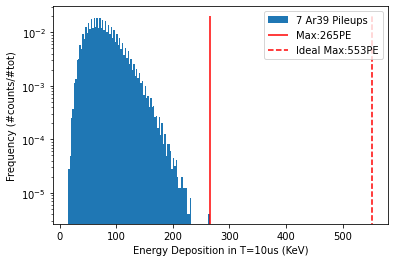

In [3]:
# Plot PE detection of 7 Ar39s pileups
plt.hist(df7ar39.pedetected, bins=100, label="7 Ar39 Pileups", density=True)
plt.vlines(df7ar39.pedetected.max(), ymin=0, ymax=.02, color='r', label="Max:{}PE".format(df7ar39.pedetected.max()))
plt.vlines(int(7*565*40*0.0035), ymin=0, ymax=.02, color='r', linestyles='dashed', label="Ideal Max:{}PE".format(int(7*565*40*0.0035)))
plt.legend()
plt.xlabel("Energy Deposition in T=10us (KeV)")
plt.ylabel("Frequency (#counts/#tot)")
plt.yscale("log")
plt.show()

In [5]:
# load muon wt 0 < pedetected < max (265PE)
dirin = "/home/luigi/Development/ML4NP/Development/Out/T10us/Muons/"
filein = "Muon_Snapshots_T10000_DT10000_Grp1_Seed123456789_Part1.csv"

dfmuons = pd.read_csv(os.path.join(dirin, filein), comment='#', index_col=False)
dfmuons = dfmuons[dfmuons.columns[:-1]]   # remove last Unnamed column
dfmarginals = dfmuons[(dfmuons.pedetected > 0) & (dfmuons.pedetected <= 265)]

print("[Info] Marginal Muons (0<PE<=265): {}".format(len(dfmarginals)))

[Info] Marginal Muons (0<PE<=265): 6473


[Info] Loaded Muons
[Result] Produced 6473 events, wt avg 26.17 PE


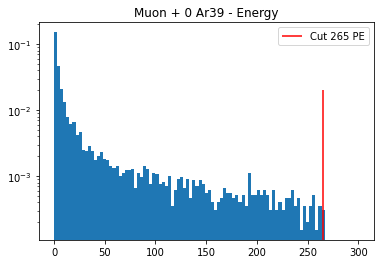

[Info] Loaded Muons
[Info] Loaded first 6473 events of 1 Ar39s
[Info]    Their Avg pe detection: 11.15 PE
[Result] Produced 6438 events, wt avg 36.04 PE


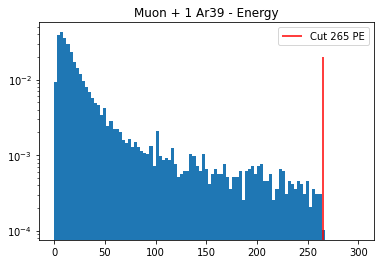

[Info] Loaded Muons
[Info] Loaded first 6473 events of 2 Ar39s
[Info]    Their Avg pe detection: 22.04 PE
[Result] Produced 6427 events, wt avg 46.55 PE


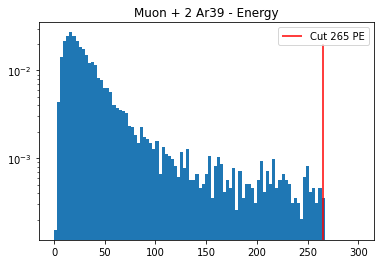

[Info] Loaded Muons
[Info] Loaded first 6473 events of 3 Ar39s
[Info]    Their Avg pe detection: 33.09 PE
[Result] Produced 6392 events, wt avg 56.37 PE


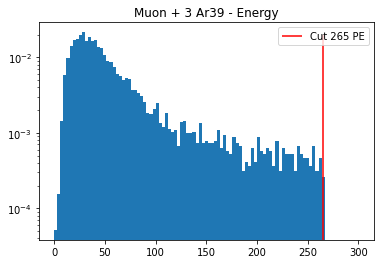

In [6]:
# creation of combined dataset muons + ar39s
import numpy as np

dirout = "/home/luigi/Development/ML4NP/Development/Out/T10us/Muons/"    # where to write combined datasets
dirin = "/home/luigi/Development/ML4NP/Development/Out/T10us/Ar39_1to7Pileups"
fileinformat = "Ar39_Snapshots_T10000_DT10000_Grp{}_Seed123456789_Part1.csv"

bins = np.linspace(0, 300, 100)
for i in range(4):
    # load marginal muons
    dfmarginals_kar39 = dfmarginals.reset_index()
    print("[Info] Loaded Muons")
    if i > 0:
        # load ar39
        filein = fileinformat.format(i)    # load 1, 2, 3 ar39
        dfKar39 = pd.read_csv(os.path.join(dirin, filein), comment='#', index_col=False)
        dfKar39 = dfKar39[dfKar39.columns[:-1]]    # remove last unnamed col
        dfKar39 = dfKar39[dfKar39.pedetected > 0]  # remove zero-detection events
        dfKar39 = dfKar39.head(len(dfmarginals_kar39))    # get first N ar39 events (avoid NaN in `add`)
        print("[Info] Loaded first {} events of {} Ar39s".format(len(dfKar39), i))
        print("[Info]    Their Avg pe detection: {:.2f} PE".format(dfKar39.pedetected.mean()))
        # combine muons + ar 39
        dfmarginals_kar39 = dfmarginals_kar39.add(dfKar39.reset_index())
    # columns selection (remove meaningless cols, like eventnumber (it is now the sum of creator events))
    dfmarginals_kar39 = dfmarginals_kar39[dfmarginals_kar39.columns[2:]]
    # cut again on energy 
    dfmarginals_kar39 = dfmarginals_kar39[(dfmarginals_kar39.pedetected > 0) & (dfmarginals_kar39.pedetected <= 265)]    
    print("[Result] Produced {} events, wt avg {:.2f} PE".format(len(dfmarginals_kar39), dfmarginals_kar39.pedetected.mean()))
    # plot
    plt.title("Muon + {} Ar39 - Energy".format(i))
    plt.hist(dfmarginals_kar39.pedetected, bins=bins, density=True)
    plt.vlines(265, ymin=0, ymax=.02, color='r', label="Cut 265 PE")
    plt.yscale('log')
    plt.legend()
    plt.show()
    # write output
    dfmarginals_kar39.to_csv(os.path.join(dirout, "MarginalMuons_wt_{}ar39_cut265PE.csv".format(i)), index=False)
    